In [ ]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame(pd.read_csv('/content/Housing (1).csv'))
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
df = data.copy()

In [ ]:
# Encoding all categorical variables
encoder = LabelEncoder()
categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in categorical_columns:
  df[col] = encoder.fit_transform(df[col])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


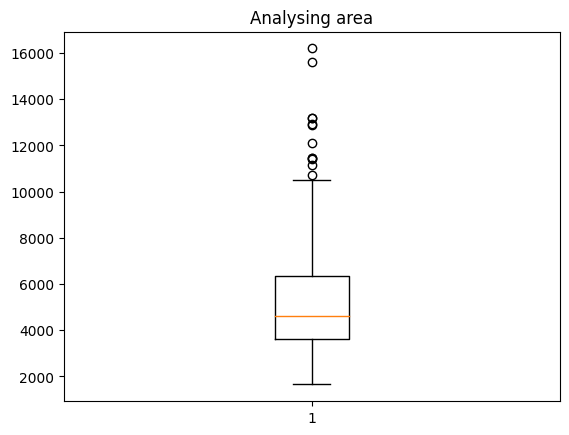

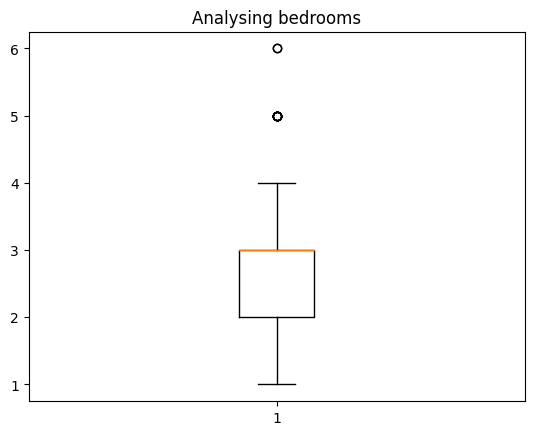

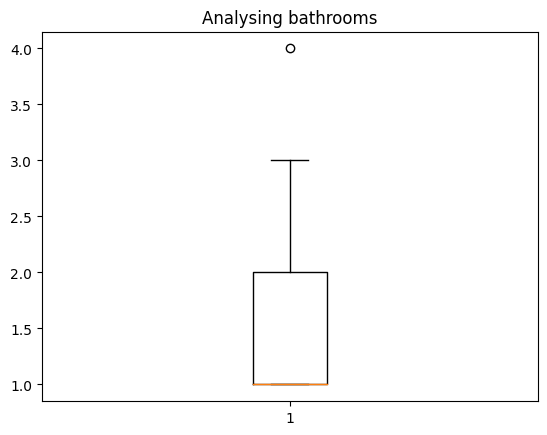

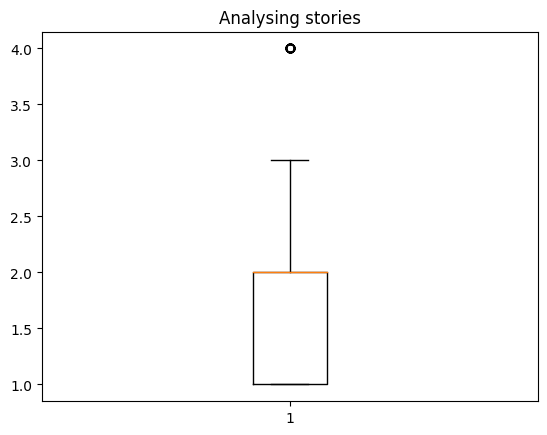

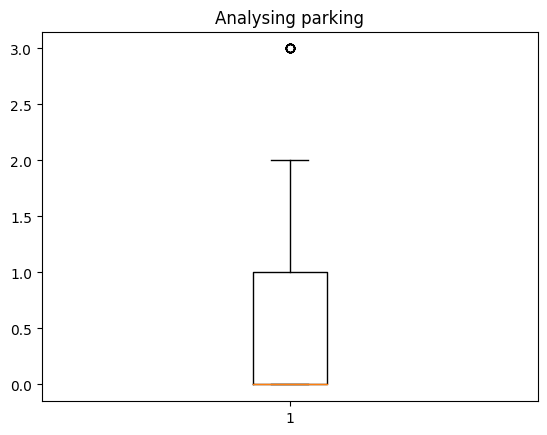

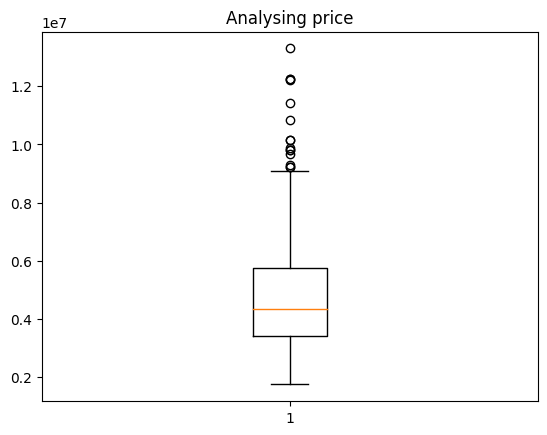

In [ ]:
# Finding Outliers in Numerical data
Numerical_columns = ['area','bedrooms','bathrooms','stories','parking','price']
for attributes in Numerical_columns:
  plt.boxplot(df[attributes])
  plt.title(f"Analysing {attributes}")
  plt.show()

In [ ]:
# Finding Outliers in Numerical data
Numerical_columns = ['area','bedrooms','bathrooms','stories','parking','price']
for attribute in Numerical_columns:
  # Identify outliers using IQR for the target variable 'price'
  Q1 = df[attribute].quantile(0.25)
  Q3 = df[attribute].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bound
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = df[(df[attribute] < lower_bound) | (df[attribute] > upper_bound)]
  print(f"Number of outliers in '{attribute}': {len(outliers)}")

  # Capping outliers at the lower and upper bounds
  df[attribute] = np.where(df[attribute] > upper_bound, upper_bound, df[attribute])
  df[attribute] = np.where(df[attribute] < lower_bound, lower_bound, df[attribute])



Number of outliers in 'area': 12
Number of outliers in 'bedrooms': 12
Number of outliers in 'bathrooms': 1
Number of outliers in 'stories': 41
Number of outliers in 'parking': 12
Number of outliers in 'price': 15


In [ ]:
# Train models using the dataset without outliers
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Split the data into training and testing sets (without outliers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions and evaluate performance after handling outliers
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Linear Regression Model (After Handling Outliers) ===")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



=== Linear Regression Model (After Handling Outliers) ===
Mean Squared Error: 1771751116594.041
R-squared: 0.6494754192267792


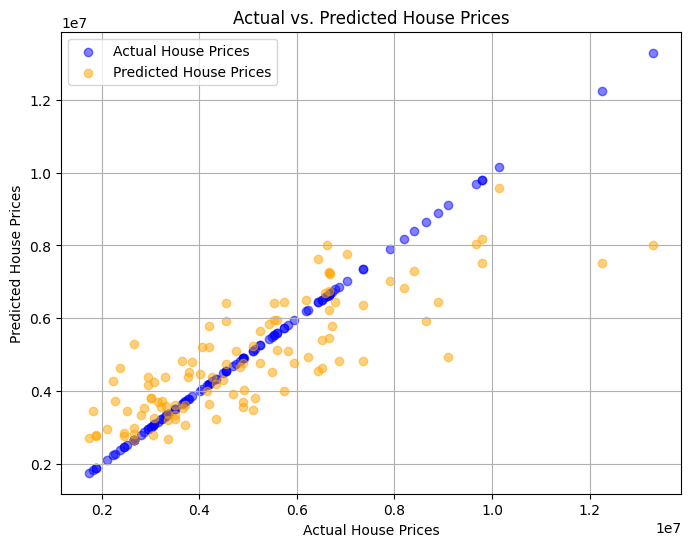

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual House Prices')
plt.scatter(y_test, y_pred, color='orange', alpha=0.5, label='Predicted House Prices')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.title('Actual vs. Predicted House Prices')

plt.grid(True)
plt.legend()
plt.show()

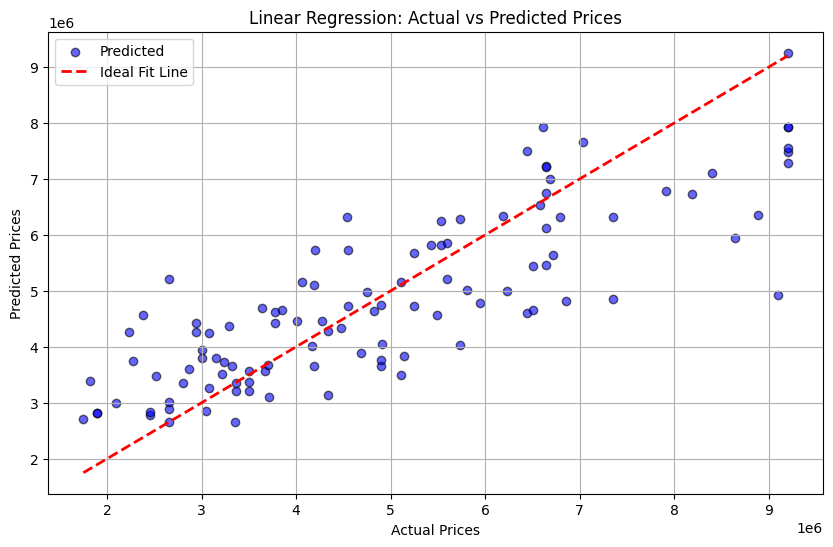

In [ ]:
#Plot graph of linear regression
import matplotlib.pyplot as plt

# Plotting Linear Regression Results: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Ideal Fit Line')

plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()



=== Multiple Linear Regression Model ===
Mean Squared Error: 1306349555394.0933
R-squared: 0.6766374954615078


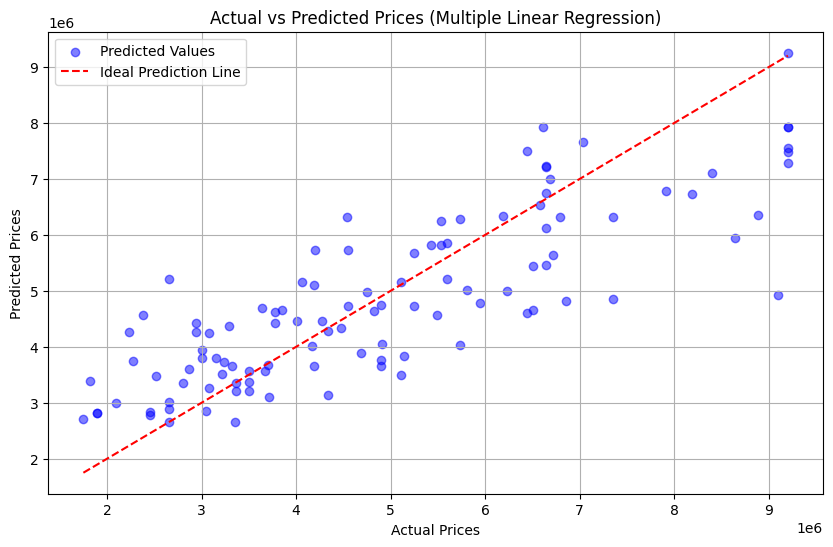

In [ ]:
# Train a Multiple Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the Multiple Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\n=== Multiple Linear Regression Model ===")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted Values', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')

plt.title('Actual vs Predicted Prices (Multiple Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()


In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions using Decision Tree
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model using Mean Squared Error (MSE) and R-squared score
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\n=== Decision Tree Model ===")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")


=== Decision Tree Model ===
Mean Squared Error: 2007572385629.358
R-squared: 0.5030628425761701


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor
boosting_regressor = GradientBoostingRegressor(random_state=42)
boosting_regressor.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_boosting = boosting_regressor.predict(X_test)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)

print("\n=== Gradient Boosting Regressor ===")
print(f"Mean Squared Error: {mse_boosting}")
print(f"R-squared: {r2_boosting}")



=== Gradient Boosting Regressor ===
Mean Squared Error: 1272115874719.7266
R-squared: 0.685111405585123


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_forest = forest_regressor.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\n=== Random Forest Regressor ===")
print(f"Mean Squared Error: {mse_forest}")
print(f"R-squared: {r2_forest}")



=== Random Forest Regressor ===
Mean Squared Error: 1490176861040.5195
R-squared: 0.6311344693296859
